<a href="https://colab.research.google.com/github/Tharun2392/23CSBTB39-40/blob/main/Assignment4(AIML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

J.THARUN(2303A52386)

Part 1

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
90%    7.350000e+06   7980.000000    4.000000    2.

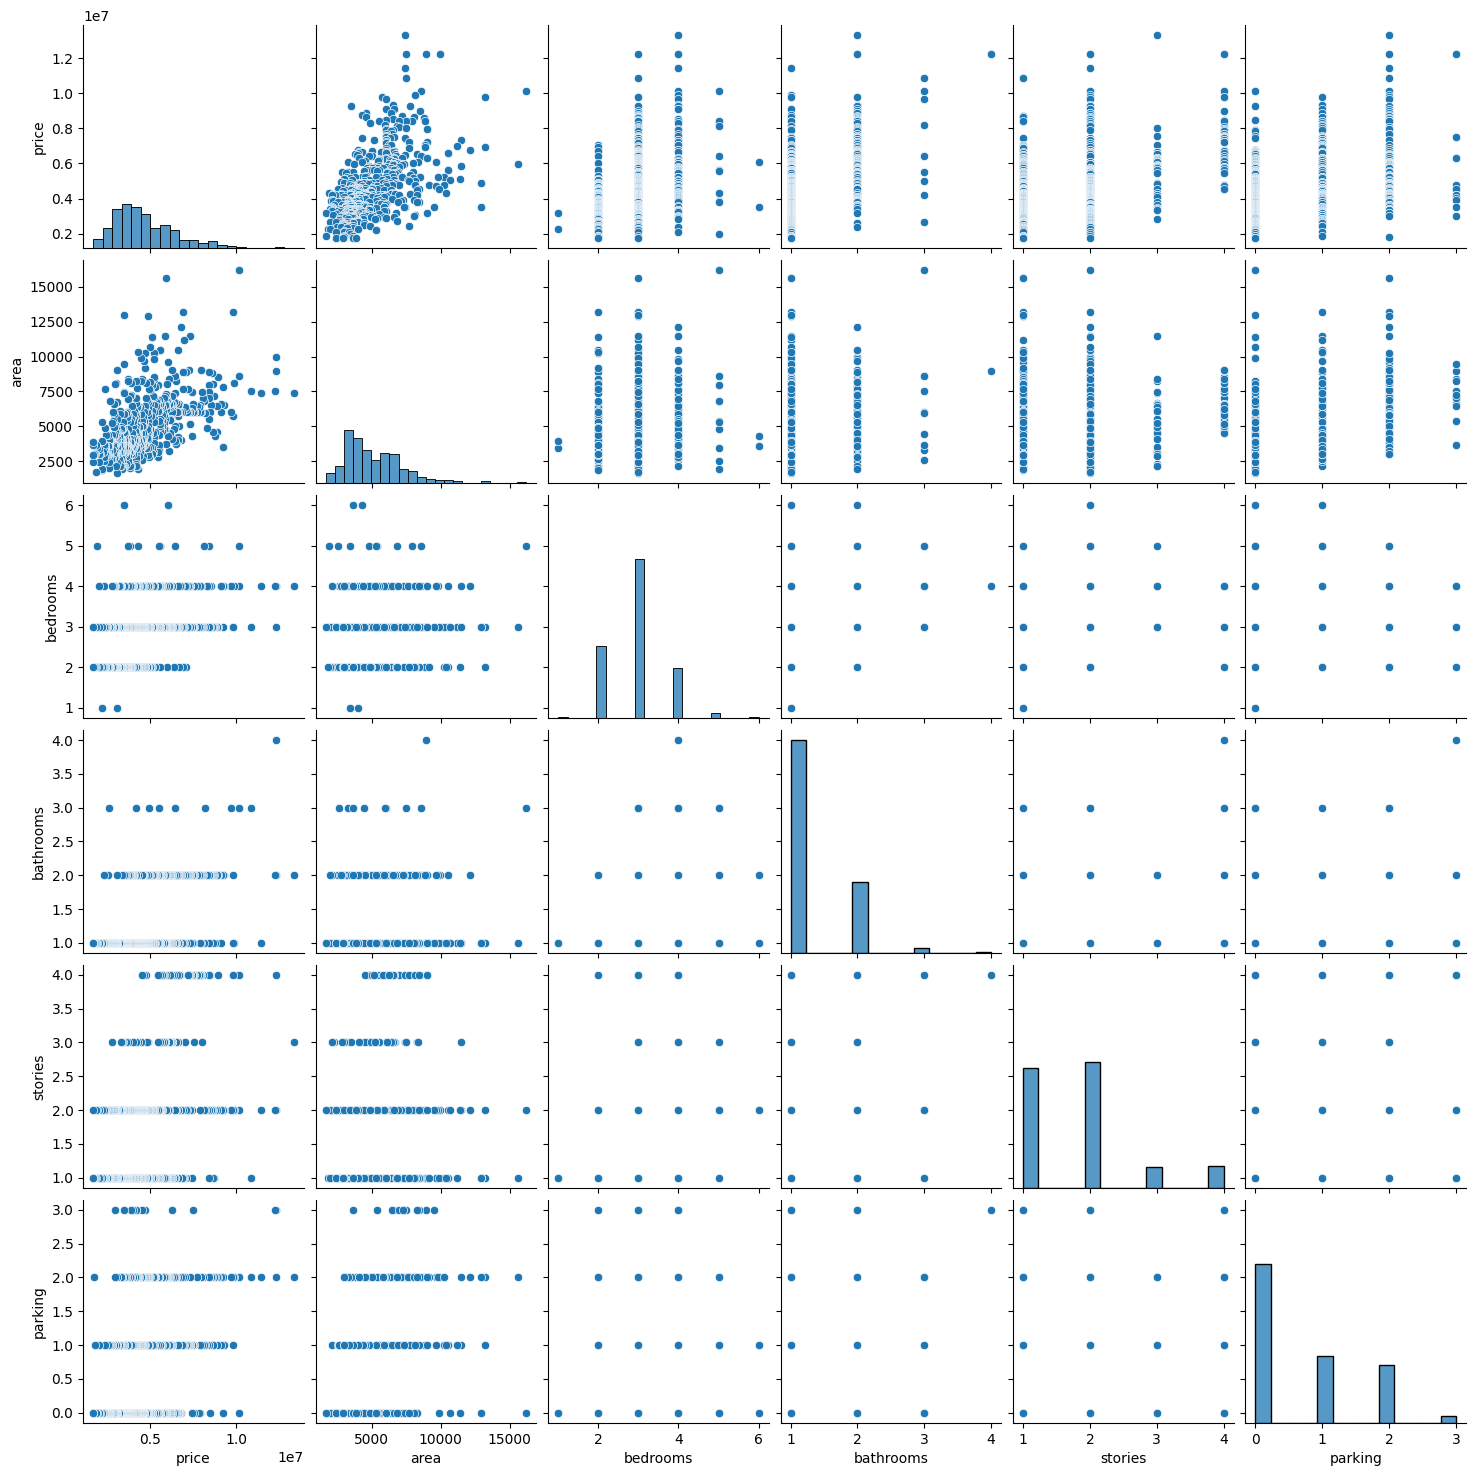

Could not convert column mainroad to numeric
Could not convert column guestroom to numeric
Could not convert column basement to numeric
Could not convert column hotwaterheating to numeric
Could not convert column airconditioning to numeric
Could not convert column prefarea to numeric
Could not convert column furnishingstatus to numeric


'corr_matrix = df.corr()\nsns.heatmap(corr_matrix, annot=True)\nplt.show()'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('USA_Housing.csv.csv')
print(df.dtypes)
print(df.describe(percentiles=[.25, .5, .75, .9]))
print(df.columns)
sns.pairplot(df)
plt.show()
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Could not convert column {col} to numeric")

"""corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()"""

PART 2

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price                int64
area                 int64
bedrooms             int64
bathrooms         

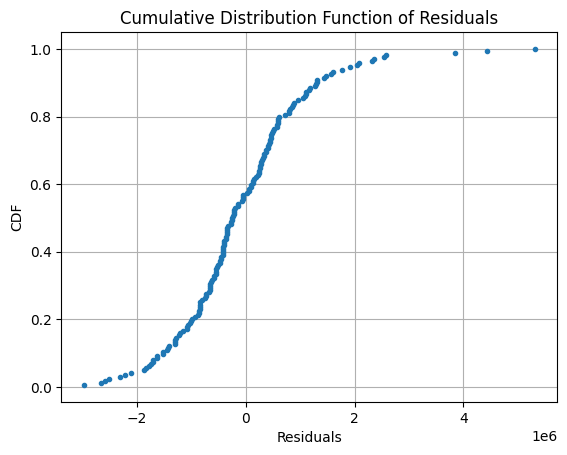

Mean Squared Error: 1523019469501.269
Intercept: 1413733.5581695996
Slope: [-2.04036841e+05  2.04036841e+05 -1.37855267e+05  1.37855267e+05
 -2.41301761e+05  2.41301761e+05 -3.08187711e+05  3.08187711e+05
 -3.42919673e+05  3.42919673e+05 -2.54596044e+05  2.54596044e+05
  1.70947968e+05  4.92953049e+04 -2.20243273e+05  2.53287252e+02
  8.08931413e+04  1.11475118e+06  4.17267580e+05  3.03111236e+05]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('USA_Housing.csv.csv')

# Display the first few rows and data types
print(df.head())
print(df.dtypes)
X = df.drop(columns='price')
Y = df['price']
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
residuals = Y_test - Y_pred
sorted_residuals = np.sort(residuals)
cdf = np.arange(1, len(sorted_residuals) + 1) / len(sorted_residuals)
plt.figure()
plt.plot(sorted_residuals, cdf, marker='.', linestyle='none')
plt.xlabel('Residuals')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Residuals')
plt.grid(True)
plt.show()
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
model = pipeline.named_steps['model']
intercept = model.intercept_
slope = model.coef_
print(f'Intercept: {intercept}')
print(f'Slope: {slope}')

PART 3

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price                int64
area                 int64
bedrooms             int64
bathrooms         

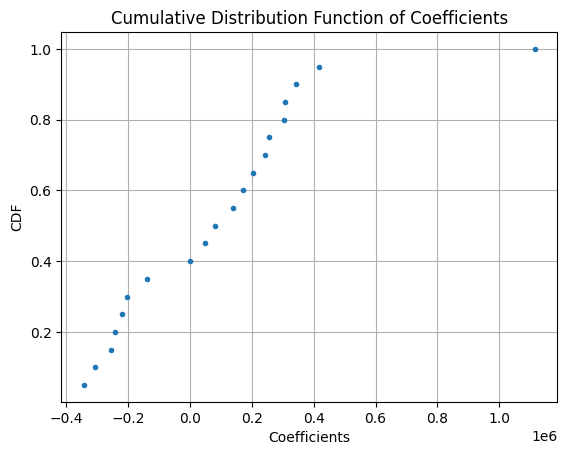

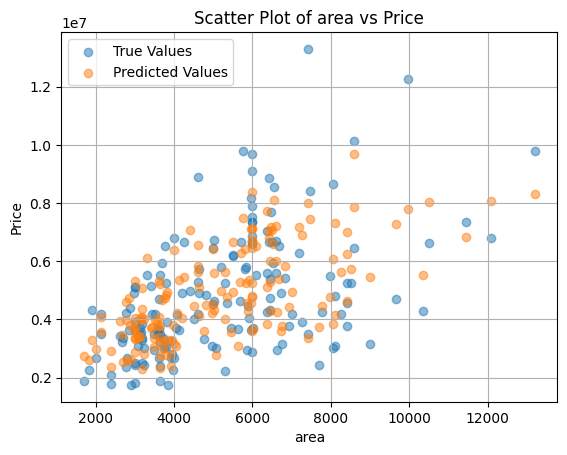

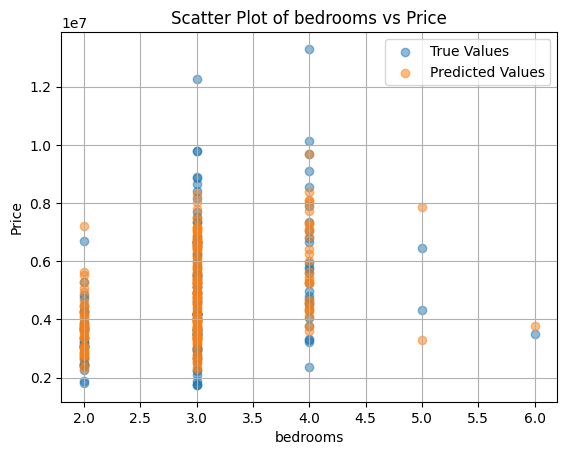

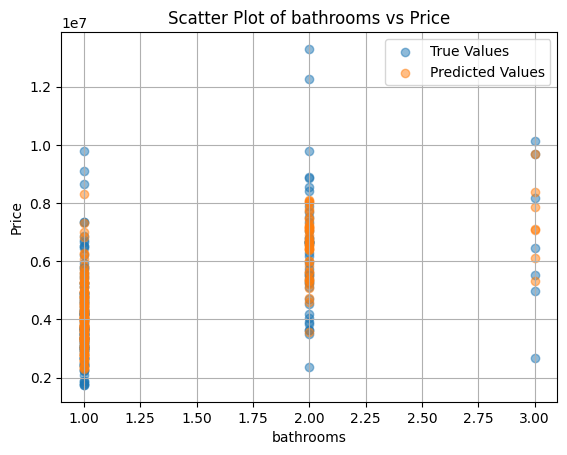

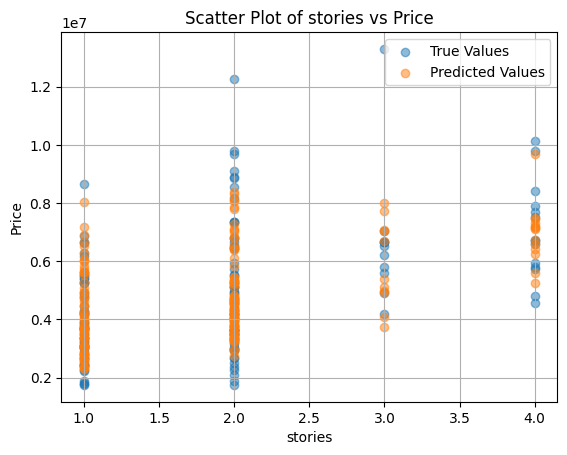

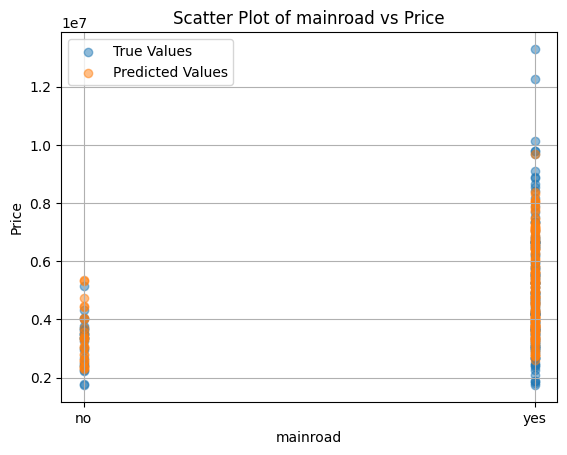

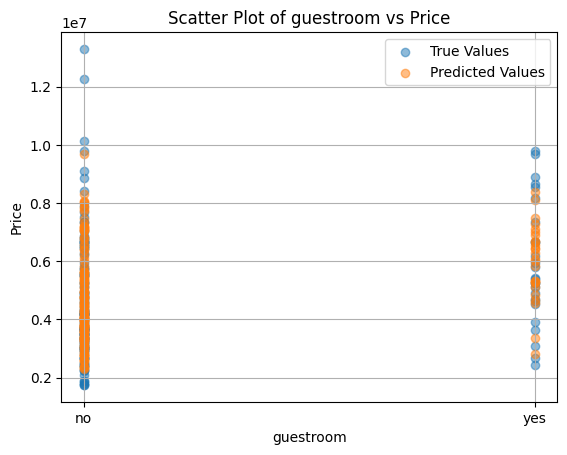

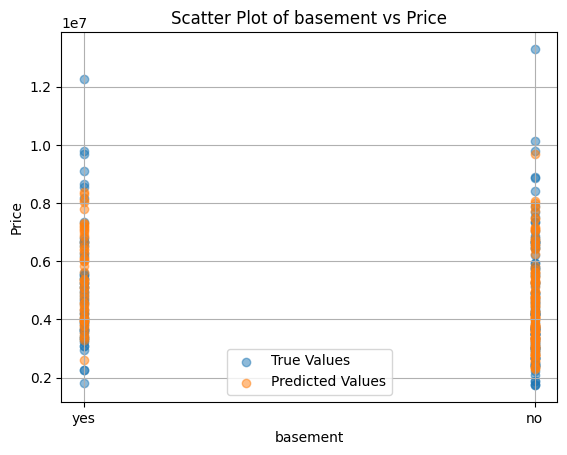

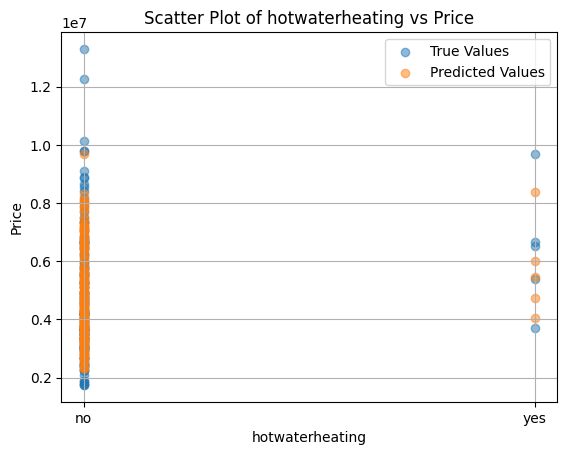

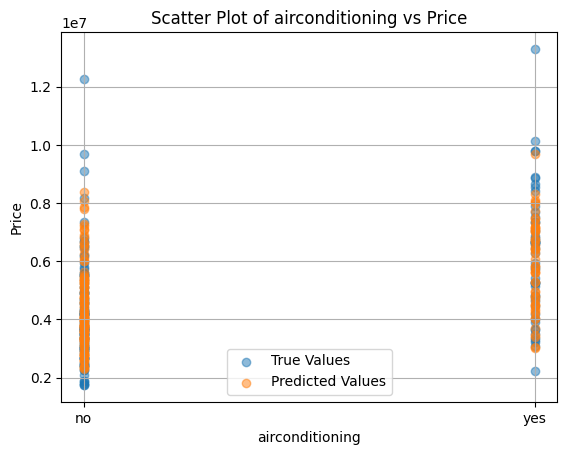

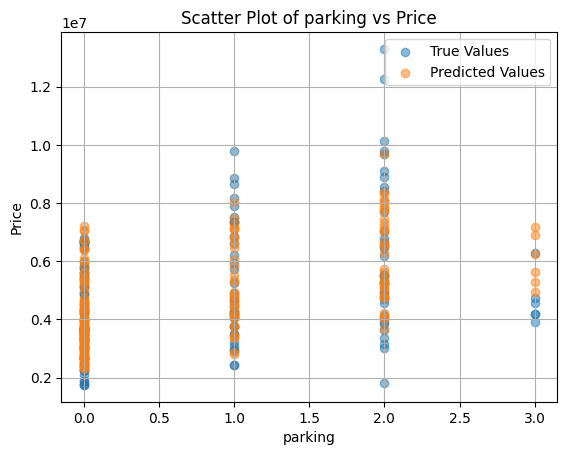

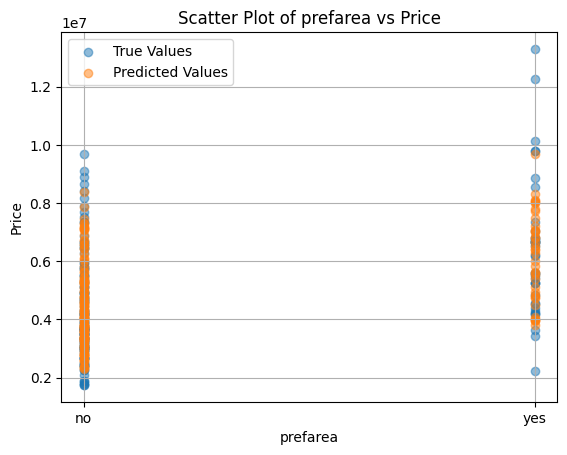

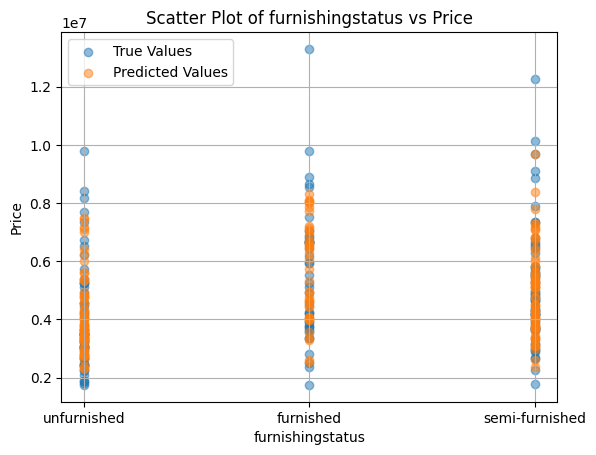

R² Score: 0.6463350878895928


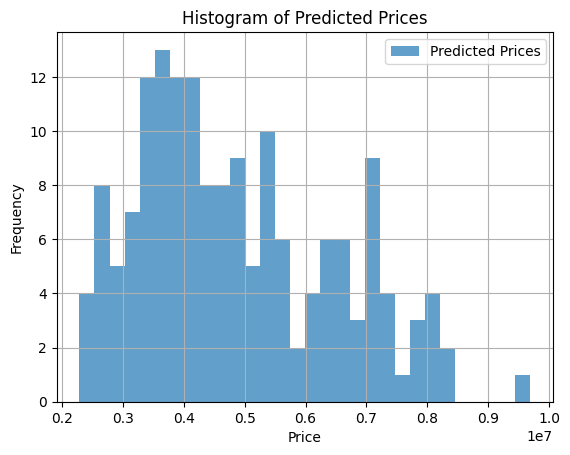

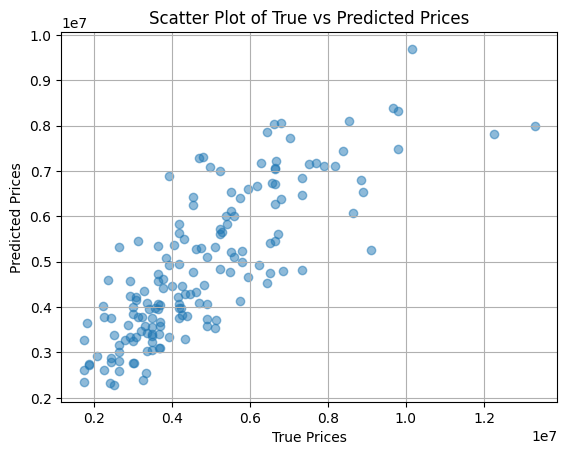

Mean Absolute Error (MAE): 920392.9397607903
Sum of Squared Errors (SSE): 249775192998208.12
Root Mean Squared Error (RMSE): 1234106.7496376757
R² Score: 0.6463350878895928


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# Load the data
df = pd.read_csv('USA_Housing.csv.csv')

# Display the first few rows and data types
print(df.head())
print(df.dtypes)

# Prepare the data
X = df.drop(columns='price')  # Features
Y = df['price']               # Target variable

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the model
pipeline.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = pipeline.predict(X_test)

# Calculate residuals
residuals = Y_test - Y_pred

# Get the coefficients for the model
model = pipeline.named_steps['model']
coefficients = model.coef_

# Adding intercept to feature matrix for statsmodels
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_train_const = sm.add_constant(X_train_transformed)

# Fit statsmodels OLS model
ols_model = sm.OLS(Y_train, X_train_const).fit()

print("\nStandard Error of Coefficients:")
print(ols_model.bse)  # Standard error of the coefficients

print("\nT-statistic of Coefficients:")
print(ols_model.tvalues)  # T-statistic of the coefficients

# Compute CDF of coefficients
sorted_coefficients = np.sort(coefficients)
cdf = np.arange(1, len(sorted_coefficients) + 1) / len(sorted_coefficients)

# Plot CDF of coefficients
plt.figure()
plt.plot(sorted_coefficients, cdf, marker='.', linestyle='none')
plt.xlabel('Coefficients')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Coefficients')
plt.grid(True)
plt.show()

# Scatter plots for features vs. Price
for feature in X.columns:
    plt.figure()
    plt.scatter(X_test[feature], Y_test, label='True Values', alpha=0.5)
    plt.scatter(X_test[feature], Y_pred, label='Predicted Values', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {feature} vs Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Compute R²
r2 = r2_score(Y_test, Y_pred)
print(f'R² Score: {r2}')

# Plot predictions - histogram and scatter plot
plt.figure()
plt.hist(Y_pred, bins=30, alpha=0.7, label='Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Prices')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot of True vs Predicted Prices')
plt.grid(True)
plt.show()

# Evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
sse = np.sum((Y_test - Y_pred) ** 2)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Sum of Squared Errors (SSE): {sse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

2 Compute the MinMax value between Observed Price and Ex-
pected Price for the US Housing Data.
1. Write the python code to compute MinMax value of a Feature within Housing data.
We compute the MinMax value using the equation.
L minmax = L minmax − min(L minmax)/
max(L minmax) − min(L minmax)
2. Normalize the data and Print the MinMax value, plot the distribution of feature.
2


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Min-Max Normalized values for feature 'price':
0    1.000000
1    0.909091
2    0.909091
3    0.906

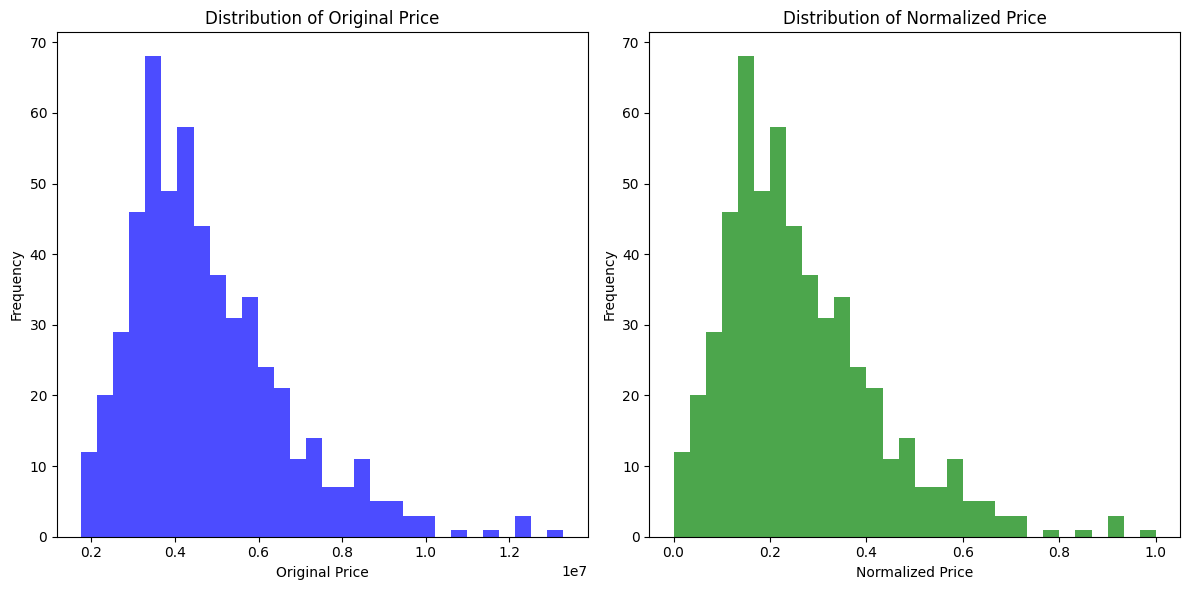

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('USA_Housing.csv.csv')

# Display the first few rows to understand the structure
print(df.head())

# Select the feature to normalize, for example 'Price'
feature = 'price'
data = df[feature]

# Compute Min-Max normalization
min_value = data.min()
max_value = data.max()
data_minmax = (data - min_value) / (max_value - min_value)

# Print the Min-Max normalized values
print(f"Min-Max Normalized values for feature '{feature}':")
print(data_minmax.head())

# Plot the distribution of the original feature
plt.figure(figsize=(12, 6))

# Original feature distribution
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, alpha=0.7, color='blue')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.title('Distribution of Original Price')

# Normalized feature distribution
plt.subplot(1, 2, 2)
plt.hist(data_minmax, bins=30, alpha=0.7, color='green')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Price')

plt.tight_layout()
plt.show()